# **Project Name**    - Strava Fitness App Data Analysis Project



# **Introduction**

With the data-driven wellness and health sector growing, it's crucial to know how users engage with fitness tracking devices so that products can be better created and more tailored experiences provided. This case study focuses on Strava Fitness, a growing wellness technology firm that produces intelligent fitness products for fit customers. The project's purpose was to analyze actual user behavior data in an attempt to identify influential patterns of behavior and create outcomes that would potentially influence future product features, drive user engagement, and inform business strategies.


# **Objective**

The goal of this Python phase of the Strava Fitness data analytics project is to clean and convert raw fitness tracking data into analysis-ready, structured, well-formatted form, and represent user behavior through insightful data visualizations. This involves importing and merging multiple datasets, eliminating duplicates and missing values, standardizing formatting, and merging high-frequency data.

Once they are cleaned, the goal is to use Python libraries such as Pandas, Matplotlib, and Seaborn to create meaningful plots that reveal patterns in physical activity, sleep, burn of calories, heart rate trends, and overall wellness. The visual outcomes are used to provide the foundation for further analysis and drive strategic product development and user interaction decisions.

# **GitHub Link -**

[Strava Fitness Project (Python)](https://github.com/pmehta2612/Strava-Fitness-Analysis-Project/tree/main/Python)

# **Problem Statement**


Strava Fitness, a healthcare technology firm providing smart fitness devices and software, collects enormous amounts of data about physical activity, sleep, and health measurements from users. The raw data, though, is not properly utilized and does not offer actionable insights into actual user interaction with the product and services of Strava. Without proper analysis, Strava fails to enhance user experience, product functionality, and individualized health advice. The firm plans to convert this raw fitness information into useful insights to get insights about the behavior of users and make data-driven decisions.

#### **Define Your Business Objective?**

1. **Interpret User Behavior Patterns:**
Take activity data at minute, hourly, and daily levels (steps, distance, calories, heart rate, METs) to determine behavior trends and usage patterns.

2. **Analyze Sleep and Wellness Trends:**
Measure users' sleep patterns and correlate them with physical activity and energy expenditure to determine overall well-being behavior.

3. **Monitor Health Statistics:**
Analyse user weight, BMI, and heart rate trends over a period to offer monitoring for health and tracking progress features.

4. **Detect High-Engagement Users:**
Segment users by activity level, consistency, and engagement in the app to enable targeted marketing and recommendation-personalization.

5. **Enhance Product and Feature Design:**
Apply data insights to guide the development of more intuitive features, customized fitness objectives, and personal user experiences.

6. **Empower Data-Driven Marketing Campaigns:**
Offer actionable insights to the product and marketing teams for campaign design, retention enhancement, and direction toward user health journeys.

# ***Let's Begin !***

## ***1. Understanding Dataset***

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load all datasets
daily_activity = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/dailyActivity_merged.csv')
sleep_day = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/sleepDay_merged.csv')
weight_log = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/weightLogInfo_merged.csv')
heart_rate = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/heartrate_seconds_merged.csv')
daily_steps = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/dailySteps_merged.csv')
daily_calories = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/dailyCalories_merged.csv')
daily_intensity = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/dailyIntensities_merged.csv')
minute_sleep = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/minuteSleep_merged.csv')
minute_mets = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/minuteMETsNarrow_merged.csv')
hourly_steps = pd.read_csv('/content/drive/MyDrive/Labmentix_Internship_Projects/Strava_Fitness_Project/hourlySteps_merged.csv')

Mounted at /content/drive


In [3]:
# Convert date columns to proper date format
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate']).dt.date
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay']).dt.date
weight_log['Date'] = pd.to_datetime(weight_log['Date']).dt.date
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay']).dt.date
daily_calories['ActivityDay'] = pd.to_datetime(daily_calories['ActivityDay']).dt.date
daily_intensity['ActivityDay'] = pd.to_datetime(daily_intensity['ActivityDay']).dt.date
minute_sleep['date'] = pd.to_datetime(minute_sleep['date'])
minute_mets['ActivityMinute'] = pd.to_datetime(minute_mets['ActivityMinute'])
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

In [4]:
# Aggregating high-frequency datasets to daily level

# Aggregate heart rate: average per day
heart_rate['Date'] = heart_rate['Time'].dt.date
heart_daily = heart_rate.groupby(['Id', 'Date'])['Value'].mean().reset_index().rename(columns={'Date': 'ActivityDate', 'Value': 'AvgHeartRate'})

# Aggregate minute sleep: sum of value per day
minute_sleep['Date'] = minute_sleep['date'].dt.date
minute_sleep_daily = minute_sleep.groupby(['Id', 'Date'])['value'].sum().reset_index().rename(columns={'Date': 'ActivityDate', 'value': 'TotalMinuteSleepFromMinuteLog'})

# Aggregate METs: sum per day
minute_mets['Date'] = minute_mets['ActivityMinute'].dt.date
minute_mets_daily = minute_mets.groupby(['Id', 'Date'])['METs'].sum().reset_index().rename(columns={'Date': 'ActivityDate', 'METs': 'TotalMETs'})

# Aggregate hourly steps: sum per day
hourly_steps['Date'] = hourly_steps['ActivityHour'].dt.date
hourly_steps_daily = hourly_steps.groupby(['Id', 'Date'])['StepTotal'].sum().reset_index().rename(columns={'Date': 'ActivityDate', 'StepTotal': 'HourlyStepTotal'})

In [5]:
# Merging All with daily_activity (Left Joins)

# Merge one by one
merged = daily_activity.merge(sleep_day, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'], how='left').drop(columns='SleepDay')

merged = merged.merge(weight_log, left_on=['Id', 'ActivityDate'], right_on=['Id', 'Date'], how='left').drop(columns='Date')

merged = merged.merge(heart_daily, on=['Id', 'ActivityDate'], how='left')

merged = merged.merge(daily_steps, left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'], how='left').drop(columns='ActivityDay')

merged = merged.merge(daily_calories, left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'], how='left').drop(columns='ActivityDay')

merged = merged.merge(daily_intensity, left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'], how='left').drop(columns='ActivityDay')

merged = merged.merge(minute_sleep_daily, on=['Id', 'ActivityDate'], how='left')

merged = merged.merge(minute_mets_daily, on=['Id', 'ActivityDate'], how='left')

merged = merged.merge(hourly_steps_daily, on=['Id', 'ActivityDate'], how='left')

In [6]:
# Dataset Rows & Columns count
print(f"Number of Rows = {merged.shape[0]}")
print(f"Number of Columns = {merged.shape[1]}")

Number of Rows = 943
Number of Columns = 38


In [7]:
# Removing repeated columns after merging
columns_to_drop = [
    'VeryActiveDistance_y', 'ModeratelyActiveDistance_y', 'LightActiveDistance_y', 'SedentaryActiveDistance_y',
    'VeryActiveMinutes_y', 'FairlyActiveMinutes_y', 'LightlyActiveMinutes_y', 'SedentaryMinutes_y',
    'Calories_y'
]

# Drop only those columns that actually exist in the DataFrame
existing_cols = [col for col in columns_to_drop if col in merged.columns]
merged.drop(columns=existing_cols, inplace=True)

In [8]:
# Standardize column names
merged.rename(columns={
    'VeryActiveDistance_x': 'VeryActiveDistance',
    'ModeratelyActiveDistance_x': 'ModeratelyActiveDistance',
    'LightActiveDistance_x': 'LightActiveDistance',
    'SedentaryActiveDistance_x': 'SedentaryActiveDistance',
    'VeryActiveMinutes_x': 'VeryActiveMinutes',
    'FairlyActiveMinutes_x': 'FairlyActiveMinutes',
    'LightlyActiveMinutes_x': 'LightlyActiveMinutes',
    'SedentaryMinutes_x': 'SedentaryMinutes',
    'Calories_x': 'Calories'
}, inplace=True)

In [9]:
# Dataset First Look
merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,WeightPounds,Fat,BMI,IsManualReport,LogId,AvgHeartRate,StepTotal,TotalMinuteSleepFromMinuteLog,TotalMETs,HourlyStepTotal
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13162,371.0,25241.0,13158.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10735,442.0,22859.0,10735.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10460,NaN,22589.0,10460.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9762,480.0,22190.0,9685.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,12669,436.0,23694.0,12669.0


In [10]:
# Dataset Information
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             943 non-null    int64  
 1   ActivityDate                   943 non-null    object 
 2   TotalSteps                     943 non-null    int64  
 3   TotalDistance                  943 non-null    float64
 4   TrackerDistance                943 non-null    float64
 5   LoggedActivitiesDistance       943 non-null    float64
 6   VeryActiveDistance             943 non-null    float64
 7   ModeratelyActiveDistance       943 non-null    float64
 8   LightActiveDistance            943 non-null    float64
 9   SedentaryActiveDistance        943 non-null    float64
 10  VeryActiveMinutes              943 non-null    int64  
 11  FairlyActiveMinutes            943 non-null    int64  
 12  LightlyActiveMinutes           943 non-null    int

In [11]:
# Dataset Duplicate Value Count
print(f"Number of Duplicate Values = {merged.duplicated().sum()}")

Number of Duplicate Values = 3


In [12]:
# Missing Values/Null Values Count
print(f"Number of missing/null values in dataset :\n{merged.isnull().sum()}")

Number of missing/null values in dataset :
Id                                 0
ActivityDate                       0
TotalSteps                         0
TotalDistance                      0
TrackerDistance                    0
LoggedActivitiesDistance           0
VeryActiveDistance                 0
ModeratelyActiveDistance           0
LightActiveDistance                0
SedentaryActiveDistance            0
VeryActiveMinutes                  0
FairlyActiveMinutes                0
LightlyActiveMinutes               0
SedentaryMinutes                   0
Calories                           0
TotalSleepRecords                530
TotalMinutesAsleep               530
TotalTimeInBed                   530
WeightKg                         876
WeightPounds                     876
Fat                              941
BMI                              876
IsManualReport                   876
LogId                            876
AvgHeartRate                     608
StepTotal                       

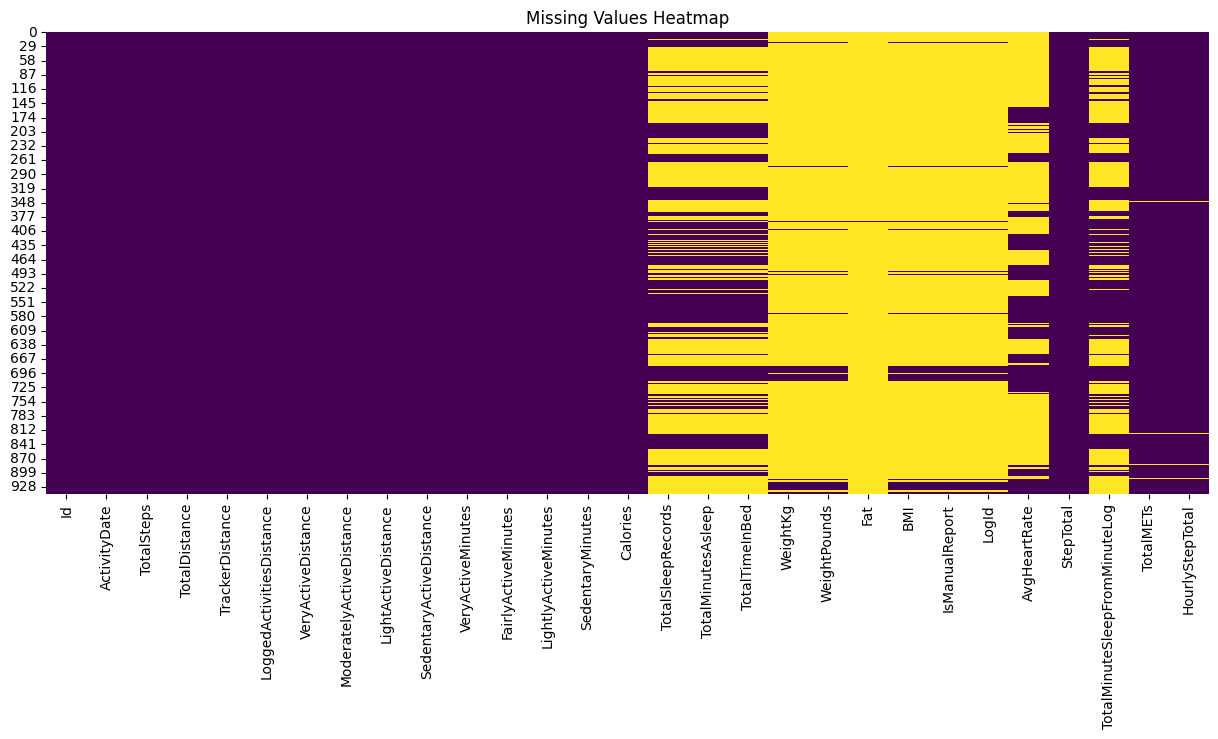

In [13]:
# Visualizing the missing values
plt.figure(figsize=(15, 6))
sns.heatmap(merged.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

After loading and merging 10 various datasets on user fitness activity, we initially examined and found the following:

1. **Dataset Structure:**

* The merged final dataset has 943 rows and 38 columns and is equal to user-level daily fitness data.

* The dataset merges daily and high-frequency (minute/hour-level) observations like steps, calories, sleep, heart rate, METs, etc.

2. **Dates Consistency:**

* All the relevant columns containing dates were converted into accurate datetime formats to allow for consistent merging and date-based analysis.

3. **Data Aggregation:**

* Datasets of high frequency (minute/hour level) were brought down to daily level prior to merging in order to match the daily granularity of daily_activity dataset.

4. **Data Merging:**

* Applied left joins with daily_activity as the master table to ensure all user activity records even if other datasets had incomplete entries.

5. **Redundancy Removal:**

* A few columns with "_y" suffixes were duplicates following merger and safely dropped to prevent redundancy.

6. **Standardizing Columns:**

* Renamed and cleaned up inconsistent column names for standardization and easy reference while performing analysis and visualization.

7. **Duplicates & Null Values:**

* Duplicates found: 3 records.

* Certain columns contained missing data, particularly in sections such as sleep, weight logs, heart rate, and minute-level data — which are varied levels of user activity and data tracking rates.

This understanding was the basis for focused data cleaning, imputation, and analysis in order to render the dataset is complete, consistent, and ready for generating insights.

## ***2. Understanding Variables***

In [14]:
# Dataset Columns
merged.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'WeightKg',
       'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId', 'AvgHeartRate',
       'StepTotal', 'TotalMinuteSleepFromMinuteLog', 'TotalMETs',
       'HourlyStepTotal'],
      dtype='object')

In [15]:
# Dataset Describe
merged.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,...,WeightKg,WeightPounds,Fat,BMI,LogId,AvgHeartRate,StepTotal,TotalMinuteSleepFromMinuteLog,TotalMETs,HourlyStepTotal
count,9.430000e+02,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,67.000000,67.000000,2.00000,67.000000,6.700000e+01,335.000000,943.000000,444.000000,937.000000,937.000000
mean,4.858486e+09,7652.188759,5.502853,5.488547,0.110045,1.504316,0.570880,3.349258,0.001601,21.239661,...,72.035821,158.811801,23.50000,25.185224,1.461772e+12,78.561603,7652.188759,466.576577,20862.313767,7589.897545
std,2.423712e+09,5086.532832,3.926509,3.909291,0.622292,2.657626,0.884775,2.046505,0.007335,32.946264,...,13.923206,30.695415,2.12132,3.066963,7.829948e+08,10.640757,5086.532832,175.040752,4568.364621,5099.813692
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,52.599998,115.963147,22.00000,21.450001,1.460444e+12,59.377175,0.000000,5.000000,600.000000,0.000000
25%,2.320127e+09,3795.000000,2.620000,2.620000,0.000000,0.000000,0.000000,1.950000,0.000000,0.000000,...,61.400002,135.363832,22.75000,23.959999,1.461079e+12,70.444364,3795.000000,402.000000,17960.000000,3728.000000
50%,4.445115e+09,7439.000000,5.260000,5.260000,0.000000,0.220000,0.240000,3.380000,0.000000,4.000000,...,62.500000,137.788914,23.50000,24.389999,1.461802e+12,77.439143,7439.000000,479.000000,21090.000000,7379.000000
75%,6.962181e+09,10734.000000,7.720000,7.715000,0.000000,2.065000,0.805000,4.790000,0.000000,32.000000,...,85.049999,187.503152,24.25000,25.559999,1.462375e+12,84.901788,10734.000000,567.000000,23573.000000,10694.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,...,133.500000,294.317120,25.00000,47.540001,1.463098e+12,109.789625,36019.000000,1464.000000,37117.000000,36019.000000


In [16]:
# Check Unique Values for each variable.
for column in merged.columns:
    unique_values = merged[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")

Number of unique values in Id: 33
Number of unique values in ActivityDate: 31
Number of unique values in TotalSteps: 842
Number of unique values in TotalDistance: 615
Number of unique values in TrackerDistance: 613
Number of unique values in LoggedActivitiesDistance: 19
Number of unique values in VeryActiveDistance: 333
Number of unique values in ModeratelyActiveDistance: 211
Number of unique values in LightActiveDistance: 491
Number of unique values in SedentaryActiveDistance: 9
Number of unique values in VeryActiveMinutes: 122
Number of unique values in FairlyActiveMinutes: 81
Number of unique values in LightlyActiveMinutes: 335
Number of unique values in SedentaryMinutes: 549
Number of unique values in Calories: 734
Number of unique values in TotalSleepRecords: 4
Number of unique values in TotalMinutesAsleep: 257
Number of unique values in TotalTimeInBed: 243
Number of unique values in WeightKg: 35
Number of unique values in WeightPounds: 35
Number of unique values in Fat: 3
Number 

### Variables Description

1. **Id:** Unique user identifier.

2. **ActivityDate:** Date of activity log.

3. **TotalSteps / StepTotal:** Total steps per day.

4. **TotalDistance:** Total distance covered.

5. **Very/Moderate/Light/Sedentary Active Distance:** Distance under various levels of activity.

6. **Very/Fairly/Lightly/Sedentary Minutes:** Time spent for each of the various levels of activity.

7. **Calories:** Number of calories burned daily.

8. **Sleep Columns:** Sleep, time asleep, and time in bed.

9. **WeightKg / BMI:** Weight and body mass index.

10. **IsManualReport:** If weight was entered manually.

11. **AvgHeartRate:** Day average heart rate.

12. **TotalMETs:** METs energy expenditure measure.

13. **HourlyStepTotal:** Hourly steps total (summed).

14. **TotalMinutesSleepFromMinuteLog:** Minute-level sleep duration.

## 3. ***Data Wrangling***

In [17]:
# Data Cleaning Code
# Create copy of merged dataset
df = merged.copy()

In [18]:
# Drop unnecessary Columns
df.drop(['Fat', 'LogId'], axis=1, inplace=True)

In [19]:
# Handling null values
# 1. Sleep Related Columns
df['TotalSleepRecords'].fillna(0, inplace=True)
df['TotalMinutesAsleep'].fillna(0, inplace=True)
df['TotalTimeInBed'].fillna(0, inplace=True)

# 2. Weight and BMI columns
df['WeightKg'].fillna(df['WeightKg'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

# 3. IsManualReport column
df['IsManualReport'].fillna('Not Reported', inplace = True)

# 4. Heart Rate Columns
df['AvgHeartRate'].fillna(df['AvgHeartRate'].median(), inplace=True)

# 5. Minute Sleep & METs Columns
df['TotalMinuteSleepFromMinuteLog'].fillna(0, inplace=True)
df['TotalMETs'].fillna(df['TotalMETs'].median(), inplace=True)
df['HourlyStepTotal'].fillna(df['HourlyStepTotal'].median(), inplace=True)

In [20]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [21]:
# Convert 'ActivityDate' to datetime format
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], errors='coerce')

# Convert 'IsManualReport' to category
df['IsManualReport'] = df['IsManualReport'].astype('category')

In [22]:
# Round WeightKg column to 2 decimal places
df['WeightKg'] = df['WeightKg'].round(2)

# Round BMI column to 2 decimal places
df['BMI'] = df['BMI'].round(2)

# Round Average Heart Rate column to 2 decimal places
df['AvgHeartRate'] = df['AvgHeartRate'].round(2)

In [23]:
# Remove unnecessary columns
columns_to_drop = [
    'TotalSleepRecords',
    'WeightPounds',
    'TrackerDistance',
    'LoggedActivitiesDistance',
    'StepTotal'
]

df = df.drop(columns=columns_to_drop)

In [24]:
# View cleaned dataset
print(f"Number of Rows = {df.shape[0]}\nNumber of Columns = {df.shape[1]}")
df.head()

Number of Rows = 940
Number of Columns = 22


,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,...,Calories,TotalMinutesAsleep,TotalTimeInBed,WeightKg,BMI,IsManualReport,AvgHeartRate,TotalMinuteSleepFromMinuteLog,TotalMETs,HourlyStepTotal
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,0.0,25,13,...,1985,327.0,346.0,62.5,24.39,Not Reported,77.44,371.0,25241.0,13158.0
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,0.0,21,19,...,1797,384.0,407.0,62.5,24.39,Not Reported,77.44,442.0,22859.0,10735.0
2,1503960366,2016-04-14,10460,6.74,2.44,0.40,3.91,0.0,30,11,...,1776,0.0,0.0,62.5,24.39,Not Reported,77.44,0.0,22589.0,10460.0
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,0.0,29,34,...,1745,412.0,442.0,62.5,24.39,Not Reported,77.44,480.0,22190.0,9685.0
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,0.0,36,10,...,1863,340.0,367.0,62.5,24.39,Not Reported,77.44,436.0,23694.0,12669.0


In [25]:
df.dtypes

,0
Id,int64
ActivityDate,datetime64[ns]
TotalSteps,int64
TotalDistance,float64
VeryActiveDistance,float64
ModeratelyActiveDistance,float64
LightActiveDistance,float64
SedentaryActiveDistance,float64
VeryActiveMinutes,int64
FairlyActiveMinutes,int64


In [26]:
# Save cleaned dataset
#df.to_csv('StravaFitness_Cleaned_Dataset.csv', index=False)

### What all manipulations have you done and insights you found?

#### **Data Manipulations-**
1. **Made a Copy of the Dataset:**

Preserved original data and perform manipulations safely without compromising raw data.

2. **Dropped Unnecessary Columns:**

Dropped columns such as Fat, LogId, TotalSleepRecords, WeightPounds, TrackerDistance, LoggedActivitiesDistance, StepTotal as they contributed little or no analytical significance and contained redundant/unnecessary data.

3. **Handling Null Values:**

* **Sleep-Related Columns (TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed):**
Nulls were imputed by 0 as there was no sleeping data on those days.

* **Weight and BMI Columns (WeightKg, BMI):**
Nulls were imputed by the median to preserve central tendency without outliers effect.
* The IsManualReport column was imputed with a "Not Reported" placeholder to preserve the row and indicate missing user input.

* **Heart Rate Column (AvgHeartRate):**
Missing values have been imputed with median heart rate in order to keep the continuity for cardiovascular analysis.

* **Minute-Level Columns:**

 * TotalMinuteSleepFromMinuteLog → Imputed with 0 showing no minute-level sleep was achieved.

 * TotalMETs and HourlyStepTotal → Imputed with median to replace small missing values without impacting distribution.

4. **Removed Duplicate Records:**

While cleaning, 3 duplicate rows with same contents were found which was dropped to keep data unique.

5. **Formatted Date Columns:**

Converted ActivityDate to a datetime data type to support date-based filtering, sorting, and time-series analysis properly.

6. **Coverting Categorical Data Types:**

Column IsManualReport column converted to a categorical data type so that memory can be saved and group-based analysis can be supported.

7. **Rounded Numerical Columns:**

Numerical columns such as WeightKg and BMI were rounded to 2 decimal points for consistency and readability.

---
#### **Insights Found-**

1. The Fat column contained just two values across the entire dataset → dropped due to a lack of information to analyze.

2. Many users failed to enter weight or sleep data on a regular basis, affecting varying levels of user interest.

3. Duplicate or redundant measures such as WeightPounds, StepTotal, etc. were redundant for more reliable fields and removed in order to avoid confusion.

4. Null values in METs and heart rate were not significant and imputed perfectly without disturbing the dataset.

5. There were 22 relevant columns in the dataset after cleaning with no missing values, and no duplicates. Therefore, dataset is well prepared for additional SQL-based analysis as well as Python visualizations.



## ***4. Data Vizualization***

In [27]:
# Set visualization style
plt.style.use('ggplot')

## **Univariate Analysis**

#### Chart - 1 - Total Steps Distribution

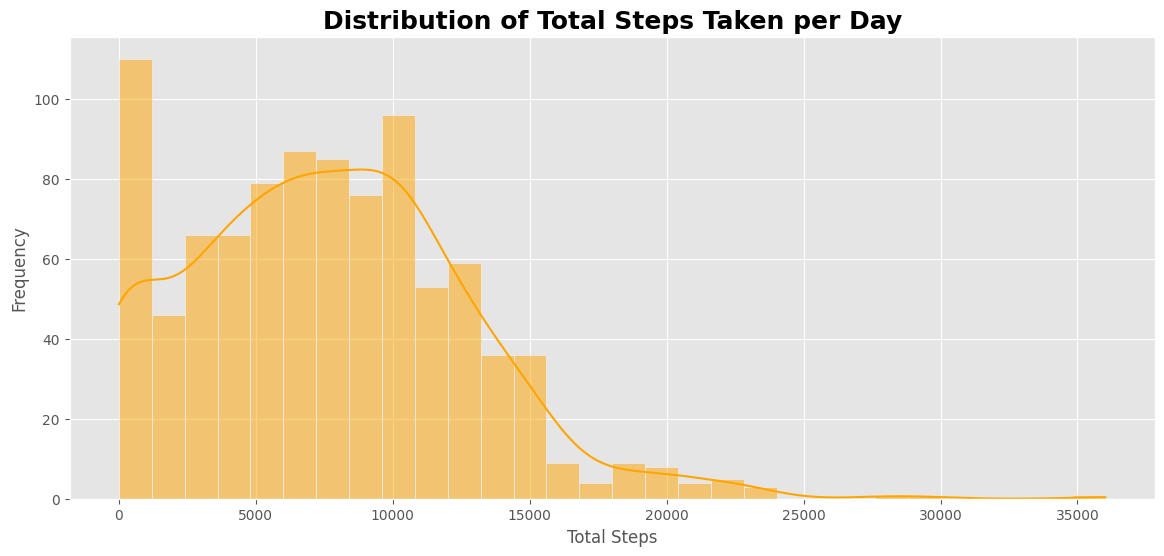

In [28]:
# Chart - 1 visualization code
# Plot histogram with KDE
plt.figure(figsize=(14, 6))
sns.histplot(df['TotalSteps'], bins=30, kde=True, color='orange')
# Add title and labels
plt.title('Distribution of Total Steps Taken per Day', fontsize=18, fontweight = 'bold')
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

* Most users take between 4,000 and 10,000 steps per day, showing moderately active behavior.
* There is a right skewness which means a minimal percentage group exceeds 15,000+ steps, showing some high-activity users.
* This indicates that most users engage in moderate daily exercise, which corresponds to overall fitness objectives.


#### Chart - 2 - Calories Burned Distribution

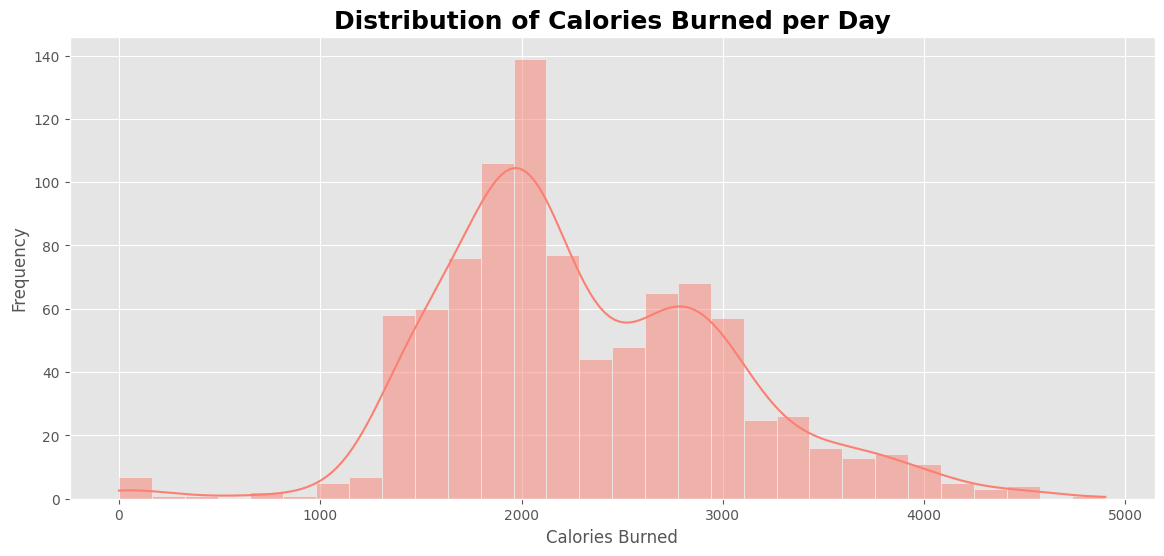

In [29]:
# Chart - 2 visualization code
# Plot histogram with KDE
plt.figure(figsize=(14, 6))
sns.histplot(df['Calories'], bins=30, kde=True, color='salmon')
# Add title and labels
plt.title('Distribution of Calories Burned per Day', fontsize=18, fontweight = 'bold')
plt.xlabel('Calories Burned', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

* The majority of the users burn between 1,700 and 2,300 calories per day, with some burning less than 1,200 and others burning over 2,800.
* There is slight left skew which means lesser calorie burn is rare. This suggests frequent day-to-day usage by the users.

#### Chart - 3 - Total Minutes Asleep

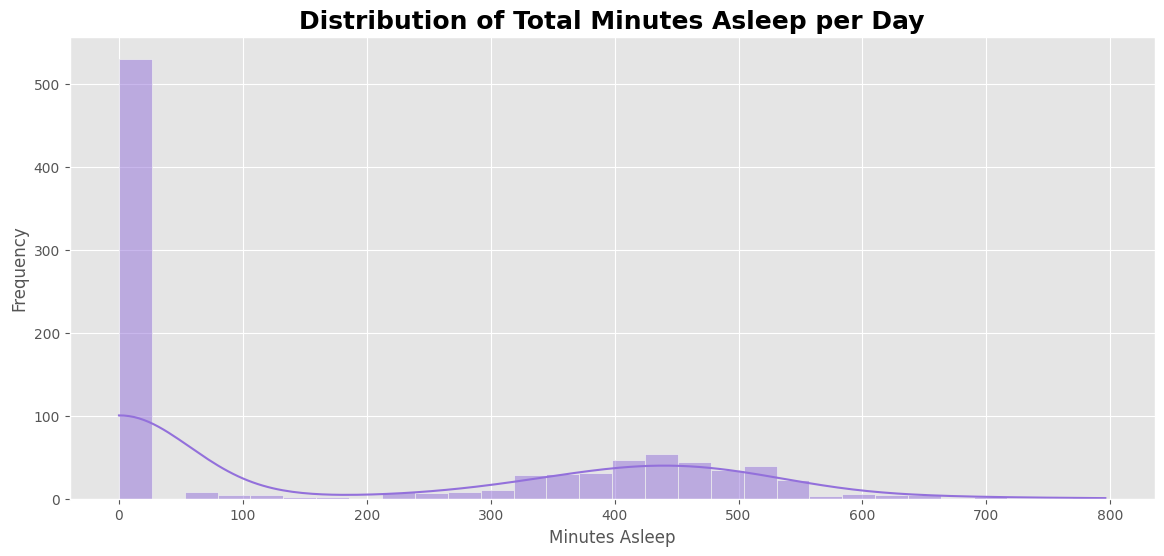

In [30]:
# Chart - 3 visualization code
# Plot histogram with KDE
plt.figure(figsize=(14, 6))
sns.histplot(df['TotalMinutesAsleep'], bins=30, kde=True, color='mediumpurple')
# Add title and labels
plt.title('Distribution of Total Minutes Asleep per Day', fontsize=18, fontweight = 'bold')
plt.xlabel('Minutes Asleep', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

* Most users sleep 300 - 450 minutes(5 to 7.5) of hours per night.
* Some records indicate 0 minutes of sleep, likely because of missing or incorrect tracking data.

#### Chart - 4 - Very Active Minutes Distribution


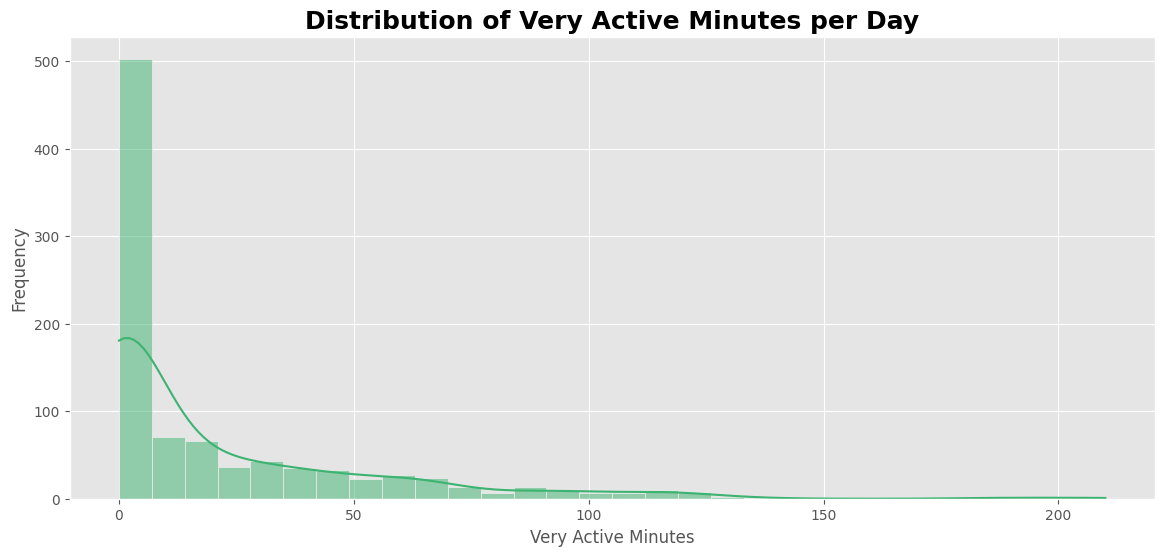

In [31]:
# Chart - 4 visualization code
# Plot histogram with KDE
plt.figure(figsize=(14, 6))
sns.histplot(df['VeryActiveMinutes'], bins=30, kde=True, color='mediumseagreen')
# Add title and labels
plt.title('Distribution of Very Active Minutes per Day', fontsize=18, fontweight = 'bold')
plt.xlabel('Very Active Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

Most of the users get 0-50 minutes of intense activity per day, which suggests light-to-moderate interaction with physical training routines.

#### Chart - 5 - Average Heart Rate Distribution

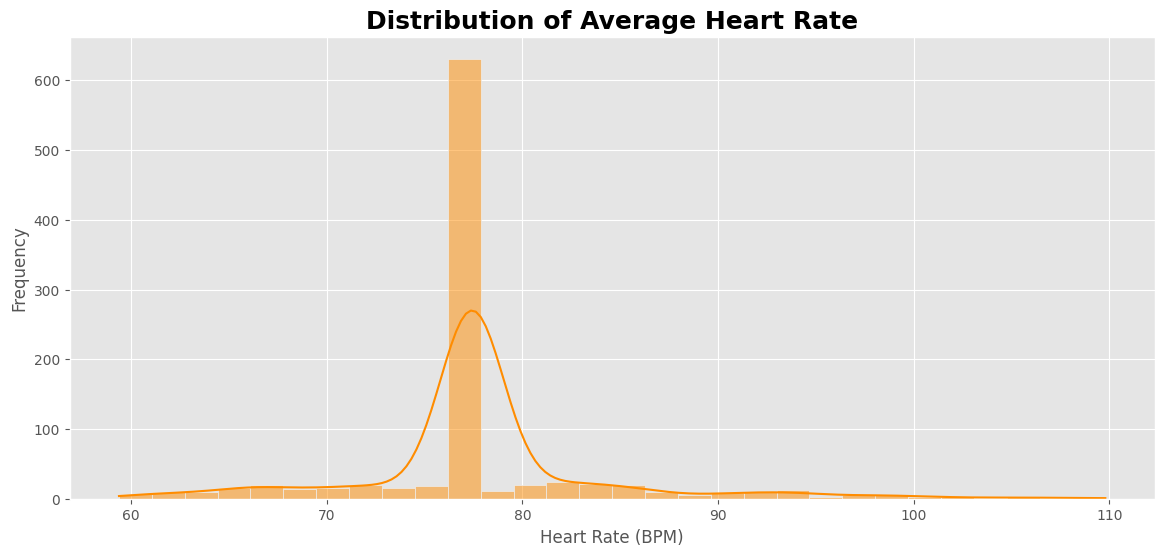

In [32]:
# Chart - 5 visualization code
# Plot histogram with KDE
plt.figure(figsize=(14, 6))
sns.histplot(df['AvgHeartRate'], bins=30, kde=True, color='darkorange')
# Add title and labels
plt.title('Distribution of Average Heart Rate', fontsize=18, fontweight = 'bold')
plt.xlabel('Heart Rate (BPM)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

The majority of users have a average heart rate of 70-85 BPM (Beats Per Minute), which is within the normal resting level range. This indicates general good cardiovascular condition of users.

#### Chart - 6 - BMI (Body Mass Index) Distribution

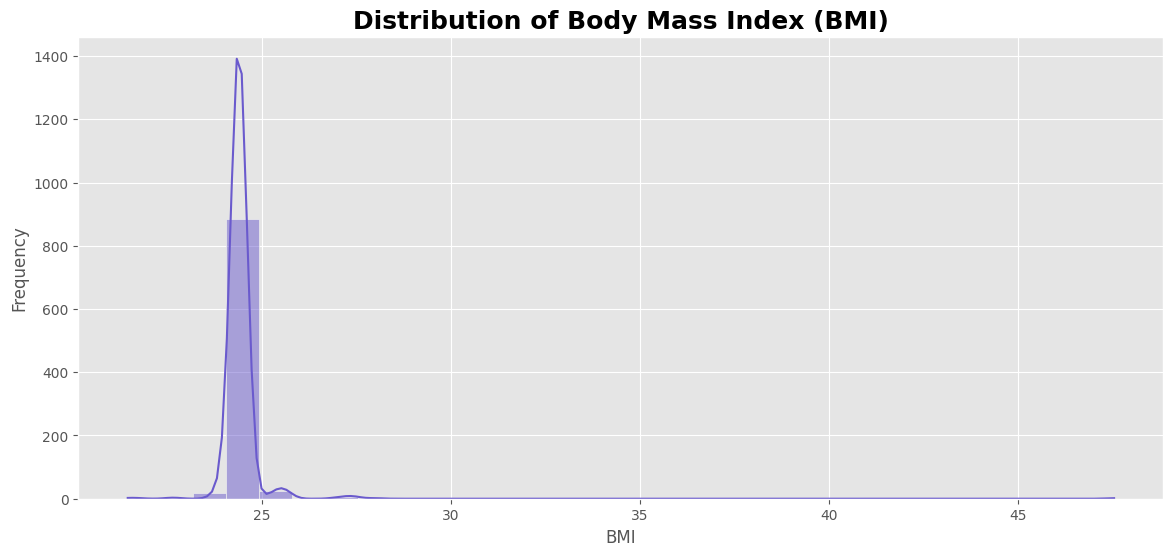

In [33]:
# Chart - 6 visualization code
# Plot histogram with KDE
plt.figure(figsize=(14, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='slateblue')
# Add title and labels
plt.title('Distribution of Body Mass Index (BMI)', fontsize=18, fontweight = 'bold')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

Most users fall under normal (18.5-24.9) and overweight (25-29.9) BMI ranges, which indicates that the platform serves fitness-conscious as well as health-conscious individuals.

#### Chart - 7 - Lightly Active Minutes

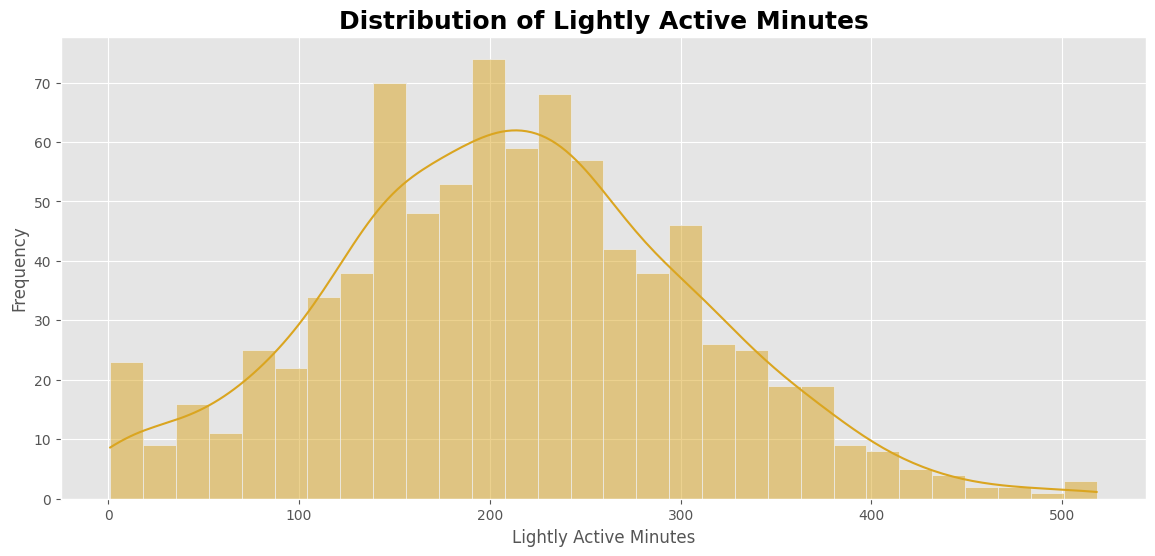

In [34]:
# Chart - 7 visualization code
# Filter out records with 0 values
df_filtered = df[df['LightlyActiveMinutes'] != 0]
# Plot histogram with KDE
plt.figure(figsize=(14, 6))
sns.histplot(df_filtered['LightlyActiveMinutes'], bins=30, kde=True, color='goldenrod')
# Add title and labels
plt.title('Distribution of Lightly Active Minutes', fontsize=18, fontweight = 'bold')
plt.xlabel('Lightly Active Minutes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

The users spend 100-250 minutes doing light activities (e.g., chores, walking). That indicates low-intensity movement are common into the daily routine.

#### Chart - 8 - Top 10 Days with Highest Step Counts

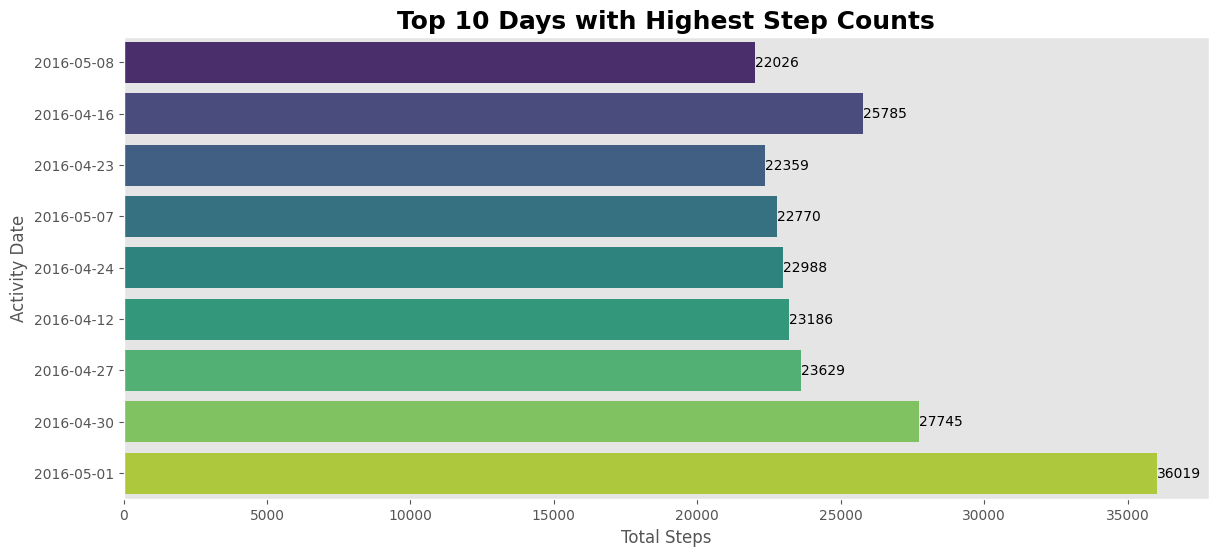

In [35]:
# Chart - 8 visualization code
# Get top 10 records with highest TotalSteps
top_steps_df = df.sort_values(by='TotalSteps', ascending=False).head(10)

# Sort by date or step count for consistent bar plot order
top_steps_df = top_steps_df.sort_values(by='TotalSteps', ascending=True)

# Create horizontal bar plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='TotalSteps', y='ActivityDate', data=top_steps_df, palette='viridis', ci = False)

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10)

# Add title and labels
plt.title('Top 10 Days with Highest Step Counts', fontsize=18, fontweight = 'bold')
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Activity Date', fontsize=12)
# Add grid
plt.grid(axis='x')
# Show plot
plt.show()

##### **Chart Insights-**

* These top 10 days contain over 22,000 steps, indicating days of strong activity.

* These high-performing days can be correlated with activities such as challenges, outdoor runs, or motivation highs by the users.

* Highlighting these days within the app can be used to motivate users or prompt achievement badges.

#### Chart - 9 - Average Daily Steps Over Time (All Users)

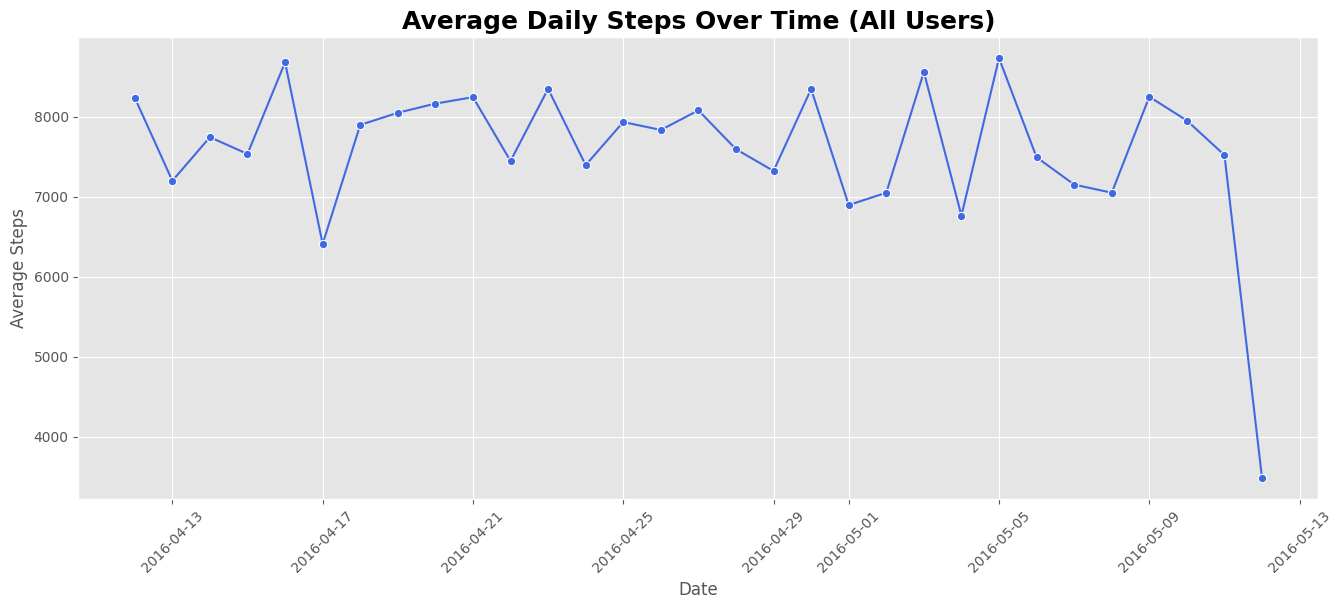

In [58]:
# Chart - 9 visualization code
# Group by date and calculate average steps
daily_engagement = df.groupby('ActivityDate')['TotalSteps'].mean().reset_index()

# Plot line chart
plt.figure(figsize=(16, 6))
sns.lineplot(data=daily_engagement, x='ActivityDate', y='TotalSteps', color='royalblue', marker='o')
# Add title and labels
plt.title('Average Daily Steps Over Time (All Users)', fontsize=18, fontweight = 'bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Steps', fontsize=12)
plt.xticks(rotation=45)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

* This line chart shows fluctuations in user activity over dates. Spikes can show days users were extremely active (weekends, fitness challenges), while dips can show low-activity days (weekdays or holidays).
* These trends guide notification timing, challenge scheduling, or feature promotion strategies.

## **Bivariate Analysis**

#### Chart - 10 - Total Steps vs Calories Burned

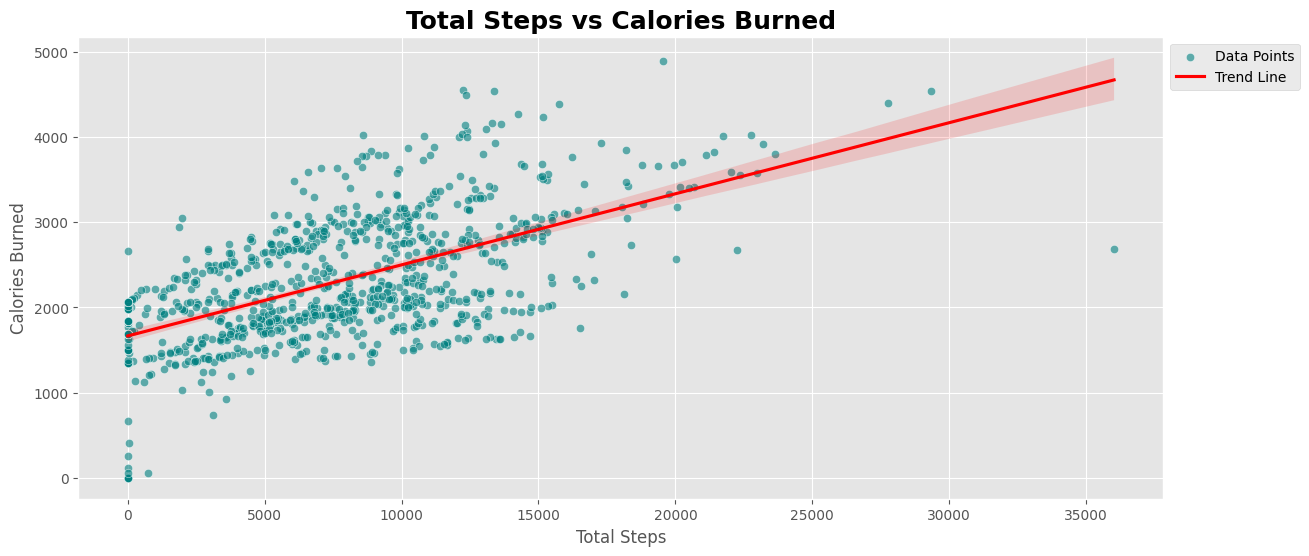

In [36]:
# Chart - 10 visualization code
# Set figure size
plt.figure(figsize=(14, 6))

# Scatter plot with regression line
sns.scatterplot(data=df, x='TotalSteps', y='Calories', color='teal', alpha=0.6, label='Data Points')
sns.regplot(data=df, x='TotalSteps', y='Calories', scatter=False, color='red', label='Trend Line')

# Add title and labels
plt.title('Total Steps vs Calories Burned', fontsize=18, fontweight = 'bold')
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add grid
plt.grid(True)
# Show plot
plt.show()


##### **Chart Insights-**

We can see that there is a strong and positive relationship between steps and calories burned. As the number of steps increases, calorie burn also increases. This verifies that movement of the physical body (steps) is main driver for energy expenditure.

#### Chart - 11 - Very Active Minutes vs Calories Burned

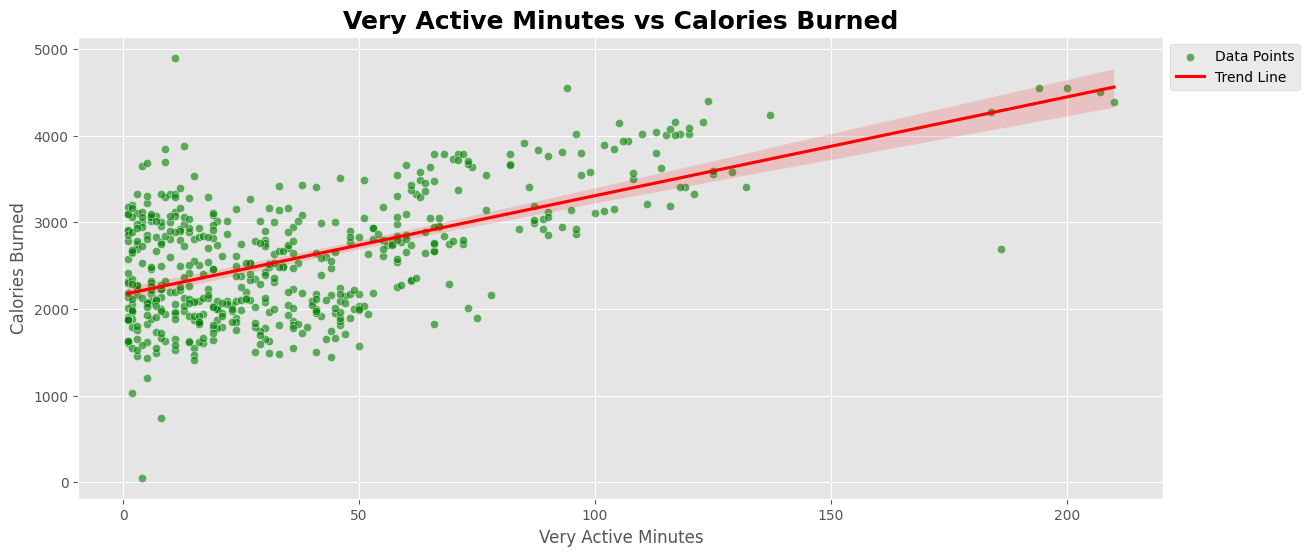

In [37]:
# Chart - 11 visualization code
# Filter out records with 0 values
df_filtered = df[df['VeryActiveMinutes'] != 0]
# Set figure size
plt.figure(figsize=(14, 6))
# Create scatter plot with regression line
sns.scatterplot(data=df_filtered, x='VeryActiveMinutes', y='Calories', color='green', alpha=0.6, label='Data Points')
sns.regplot(data=df_filtered, x='VeryActiveMinutes', y='Calories', scatter=False, color='red', label='Trend Line')
# Add title and labels
plt.title('Very Active Minutes vs Calories Burned', fontsize=18, fontweight = 'bold')
plt.xlabel('Very Active Minutes', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add grid
plt.grid(True)
# Show plot
plt.show()


##### **Chart Insights-**

There is a positive linear relationship which means the more intense the activity minutes, the higher the calories are burned. This shows the importance of intensity over duration of movement.

#### Chart - 12 - Total Minutes Asleep vs Calories Burned

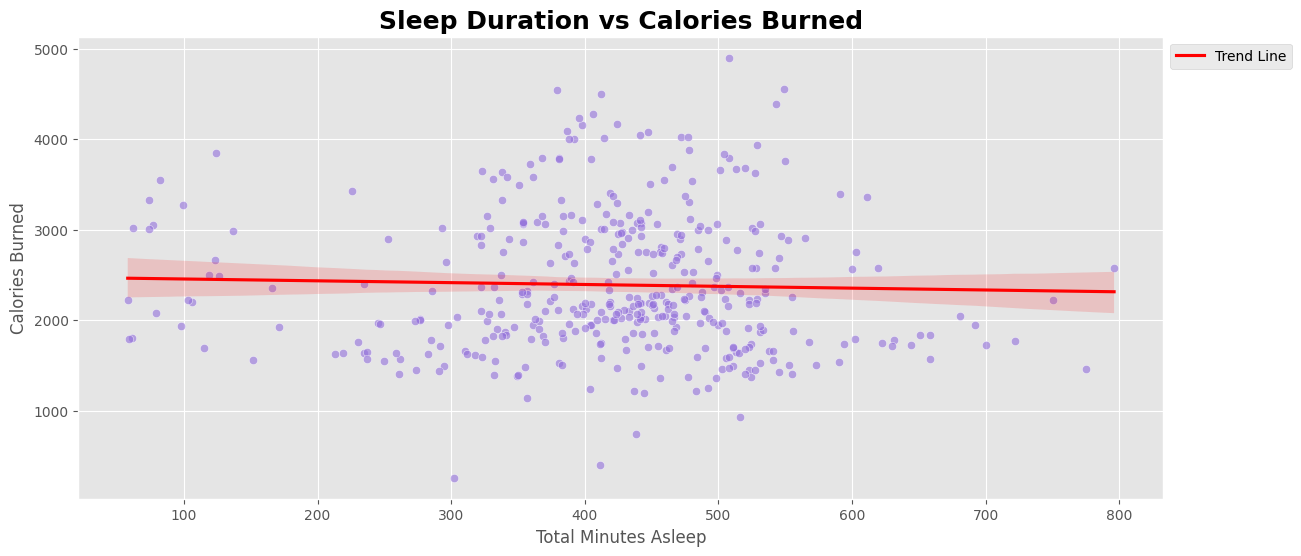

In [38]:
# Chart - 12 visualization code
# Filter out records with 0 values
df_filtered = df[df['TotalMinutesAsleep'] != 0]
# Set figure size
plt.figure(figsize=(14, 6))
# Create scatter plot with regression line
sns.scatterplot(data=df_filtered, x='TotalMinutesAsleep', y='Calories', color='mediumpurple', alpha=0.6)
sns.regplot(data=df_filtered, x='TotalMinutesAsleep', y='Calories', scatter=False, color='red', label='Trend Line')
# Add title and labels
plt.title('Sleep Duration vs Calories Burned', fontsize=18, fontweight = 'bold')
plt.xlabel('Total Minutes Asleep', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add grid
plt.grid(True)
# Show plot
plt.show()


##### **Chart Insights-**

Sleep time and calories burned aren't strongly correlated. Eventhough recovery from proper rest is essential, but it doesn't play a role in energy expenditure for the day.

#### Chart - 13 - BMI vs Average Heart Rate


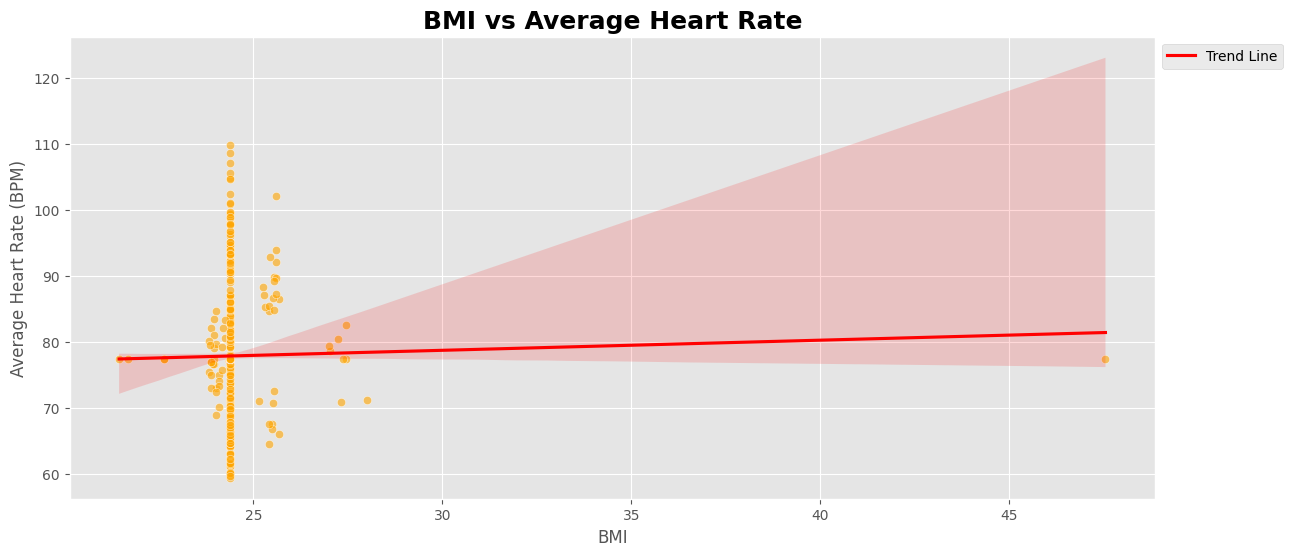

In [39]:
# Chart - 13 visualization code
# Set figure size
plt.figure(figsize=(14, 6))
# Create scatter plot with regression line
sns.scatterplot(data=df, x='BMI', y='AvgHeartRate', color='orange', alpha=0.6)
sns.regplot(data=df, x='BMI', y='AvgHeartRate', scatter=False, color='red', label='Trend Line')
# Add title and labels
plt.title('BMI vs Average Heart Rate', fontsize=18, fontweight = 'bold')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Average Heart Rate (BPM)', fontsize=12)
# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add grid
plt.grid(True)
# Show plot
plt.show()


##### **Chart Insights-**

It shows a weak positive correlation which indicates the greater BMI users have a bit higher heart rates. This might indicate higher cardiovascular stress at overweight individuals.

#### Chart - 14 - Total METs vs Total Steps

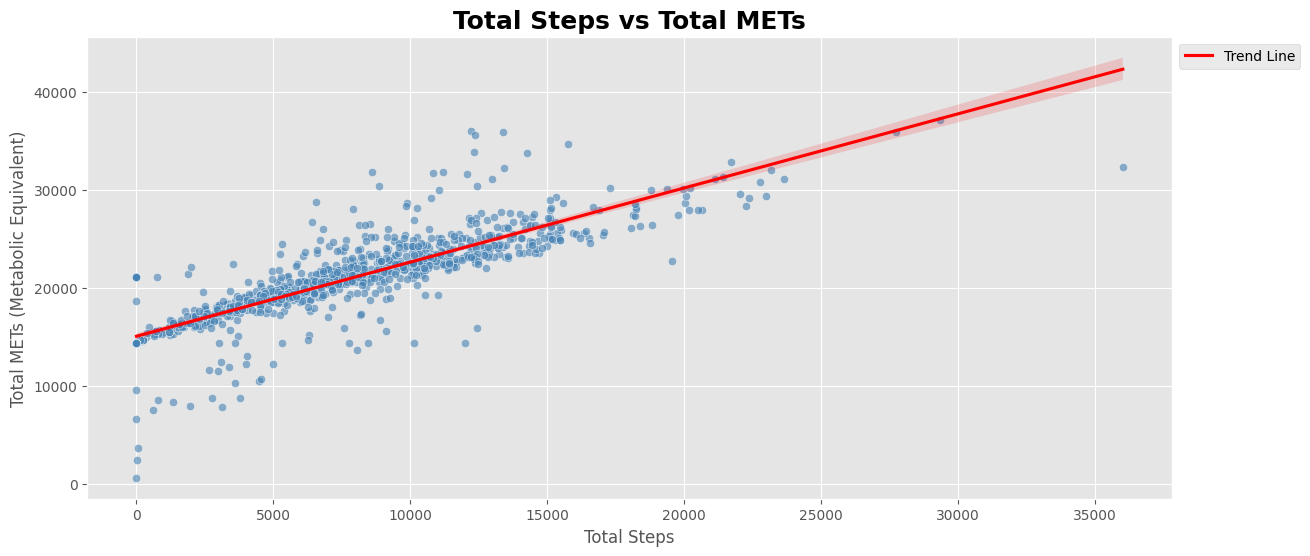

In [40]:
# Chart - 14 visualization code
# Set figure size
plt.figure(figsize=(14, 6))
# Create scatter plot with regression line
sns.scatterplot(data=df, x='TotalSteps', y='TotalMETs', color='steelblue', alpha=0.6)
sns.regplot(data=df, x='TotalSteps', y='TotalMETs', scatter=False, color='red', label='Trend Line')
# Add title and labels
plt.title('Total Steps vs Total METs', fontsize=18, fontweight = 'bold')
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Total METs (Metabolic Equivalent)', fontsize=12)
# Add legend
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

It shows a slight negative trend which means the more sedentary, the fewer calories are burned. This emphasizes the importance of reducing inactivity in order to improve fitness outcomes.

#### Chart - 15 - Total Minutes Asleep vs Total Time in Bed

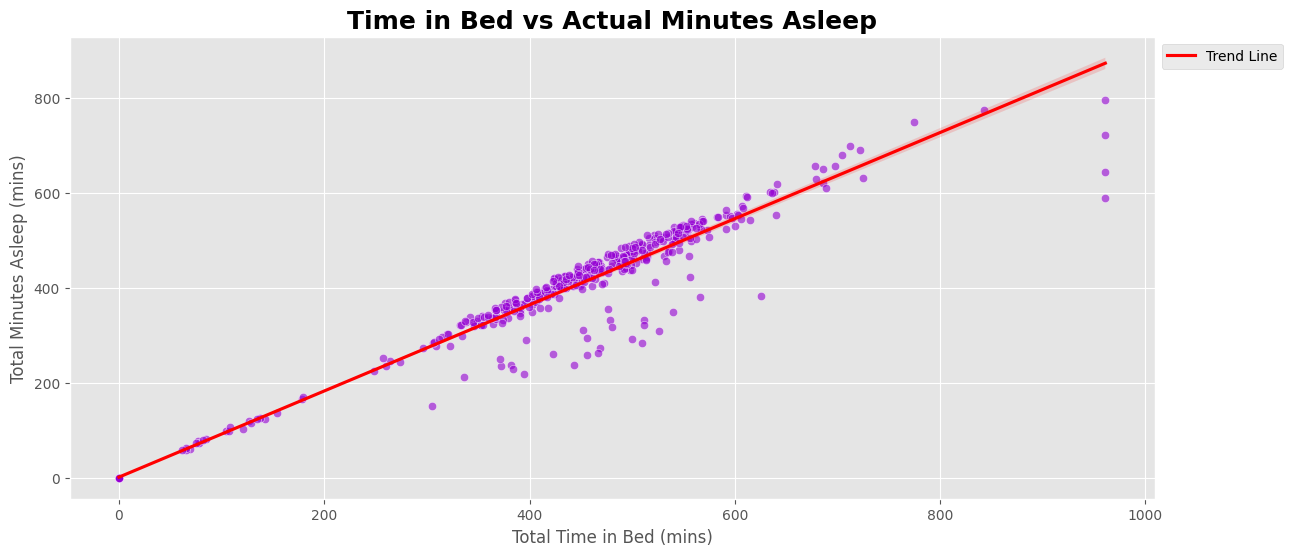

In [41]:
# Chart - 15 visualization code
# Set figure size
plt.figure(figsize=(14, 6))
# Create scatter plot with regression line
sns.scatterplot(data=df, x='TotalTimeInBed', y='TotalMinutesAsleep', color='darkviolet', alpha=0.6)
sns.regplot(data=df, x='TotalTimeInBed', y='TotalMinutesAsleep', scatter=False, color='red', label='Trend Line')
# Add title and labels
plt.title('Time in Bed vs Actual Minutes Asleep', fontsize=18, fontweight = 'bold')
plt.xlabel('Total Time in Bed (mins)', fontsize=12)
plt.ylabel('Total Minutes Asleep (mins)', fontsize=12)
# Add legend
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

There is strong correlation but most users do not get 100% of their time in bed as sleeping. This indicates sleep inefficiencies (e.g., night wake-ups or sleep latency), which are treatable through reminders from the app or relaxation training programs.

#### Chart - 16 - Total Distance vs Total Steps

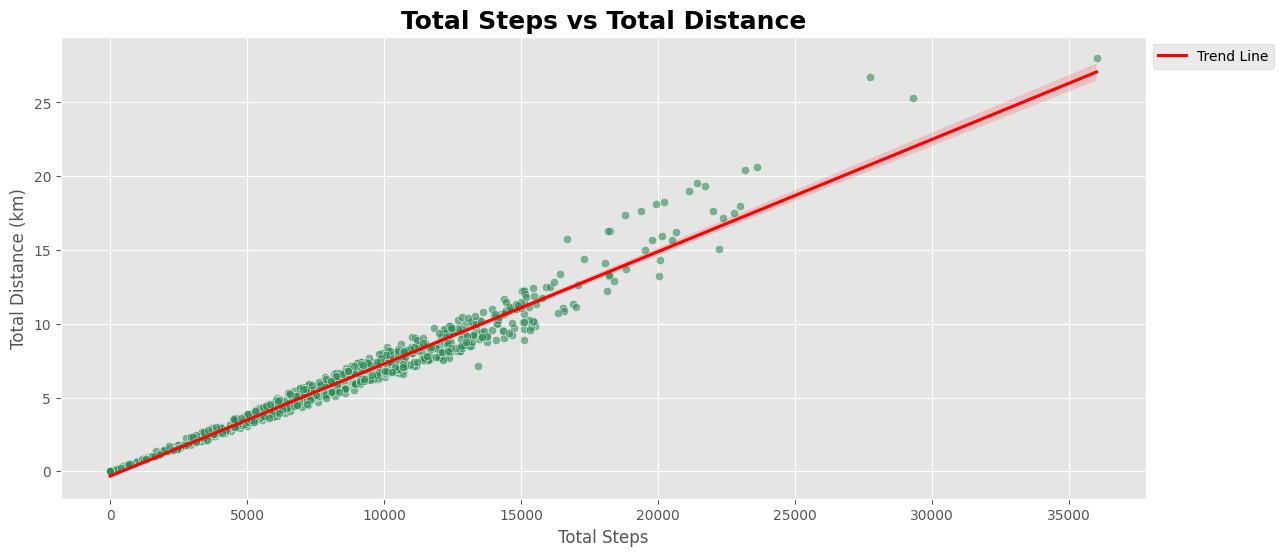

In [42]:
# Chart - 16 visualization code
# Set figure size
plt.figure(figsize=(14, 6))
# Create scatter plot with regression line
sns.scatterplot(data=df, x='TotalSteps', y='TotalDistance', color='seagreen', alpha=0.6)
sns.regplot(data=df, x='TotalSteps', y='TotalDistance', scatter=False, color='red', label='Trend Line')
# Add title and labels
plt.title('Total Steps vs Total Distance', fontsize=18, fontweight = 'bold')
plt.xlabel('Total Steps', fontsize=12)
plt.ylabel('Total Distance (km)', fontsize=12)
# Add legend
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

There is strong positive correlation. This confirms the dataset which means more steps definitely correspond to more distance, and variations here would help detecting device tracking failures.

#### Chart - 17 - Sedentary Minutes vs Calories Burned

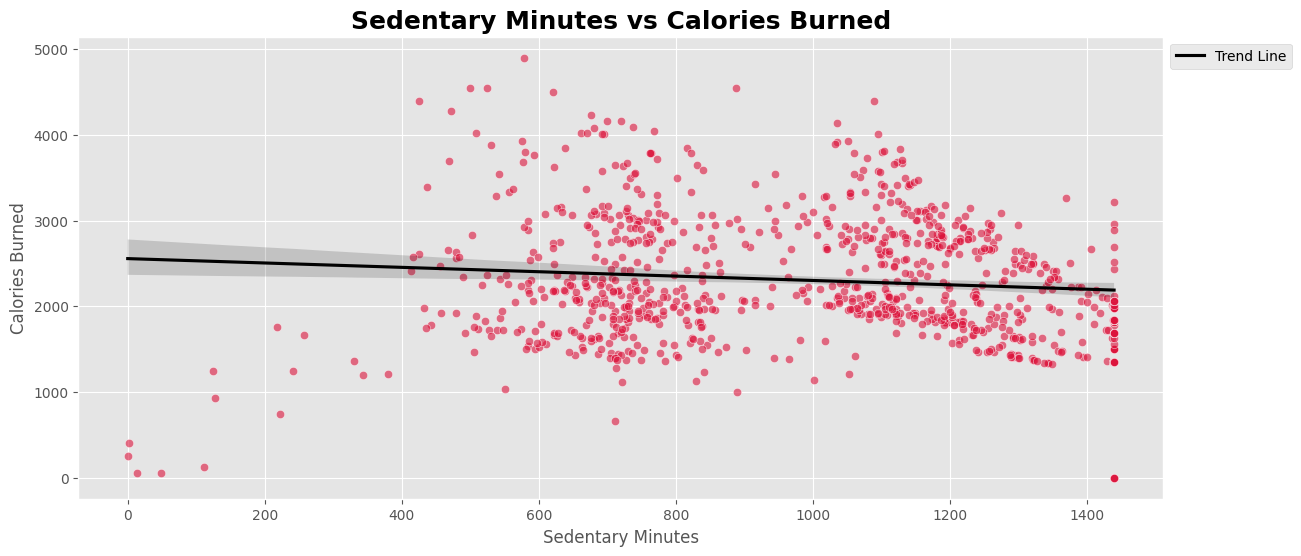

In [43]:
# Chart - 17 visualization code
# Set figure size
plt.figure(figsize=(14, 6))
# Create scatter plot with regression line
sns.scatterplot(data=df, x='SedentaryMinutes', y='Calories', color='crimson', alpha=0.6)
sns.regplot(data=df, x='SedentaryMinutes', y='Calories', scatter=False, color='black', label='Trend Line')
# Add title and labels
plt.title('Sedentary Minutes vs Calories Burned', fontsize=18, fontweight = 'bold')
plt.xlabel('Sedentary Minutes', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
# Add legend
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

There is a slightly negative trend which means the more time spent on sedentary, the less calories are burned. This shows the importance of reducing sedentary time to optimize fitness gains.

## **Multivariate Analysis**

#### Chart - 18 - Total Steps vs Calories Burned by Sleep Efficiency

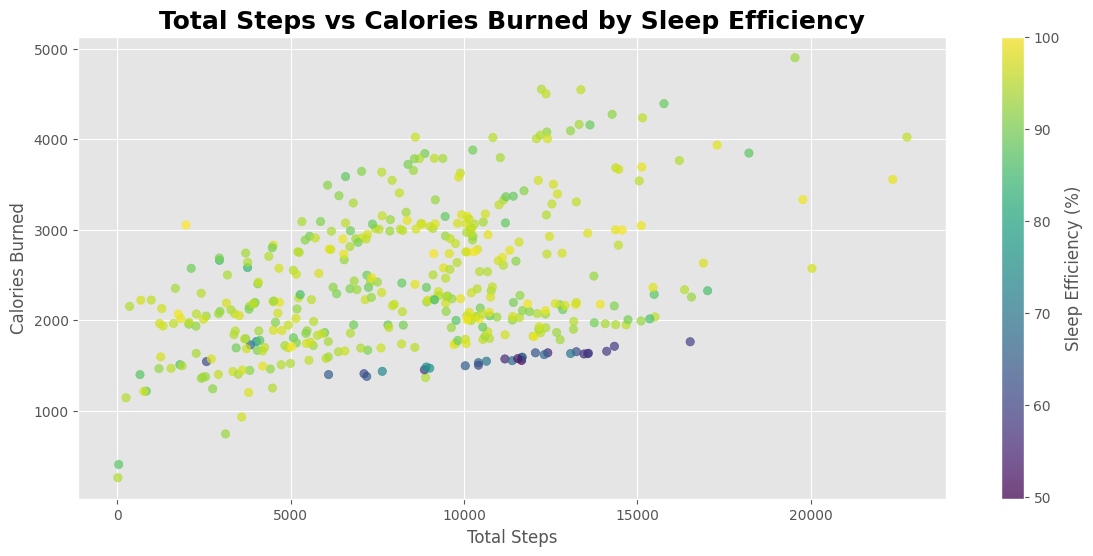

In [48]:
# Chart - 18 visualization code
# Calculate Sleep Efficiency (%)
df['SleepEfficiency'] = (df['TotalMinutesAsleep'] / df['TotalTimeInBed']) * 100

# Filter rows with non-zero bed time to avoid division issues
filtered_df = df[df['TotalTimeInBed'] > 0]

# Plot multivariate scatter
plt.figure(figsize=(14, 6))
scatter = plt.scatter(filtered_df['TotalSteps'], filtered_df['Calories'],
                      c=filtered_df['SleepEfficiency'], cmap='viridis', alpha=0.7)
# Add title and labels
plt.colorbar(scatter, label='Sleep Efficiency (%)')
plt.title('Total Steps vs Calories Burned by Sleep Efficiency', fontsize=18, fontweight = 'bold')
plt.xlabel('Total Steps', fontsize = 12)
plt.ylabel('Calories Burned', fontsize = 12)
# Add grid
plt.grid(True)
# Show plot
plt.show()

##### **Chart Insights-**

Users who are more sleep efficient (lighter shade) tend to lie in higher calorie zones, meaning restful nights can lead to more efficient physical days.


#### Chart - 19 - Activity Category vs Average Calories Burned

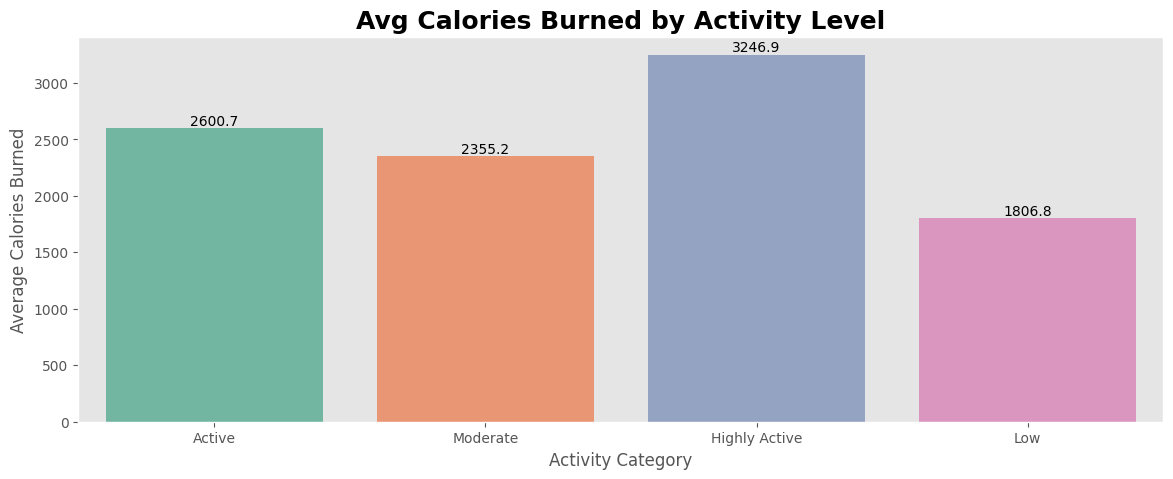

In [53]:
# Chart - 19 visualization code
# Categorize users based on total steps
def activity_level(steps):
    if steps >= 15000:
        return 'Highly Active'
    elif steps >= 10000:
        return 'Active'
    elif steps >= 5000:
        return 'Moderate'
    else:
        return 'Low'
# Apply function
df['ActivityCategory'] = df['TotalSteps'].apply(activity_level)

# Plot average calories per activity category
plt.figure(figsize=(14, 5))
ax = sns.barplot(x='ActivityCategory', y='Calories', data=df, palette='Set2', estimator='mean', ci=None)

# Add properly aligned data labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}', (x + width / 2, y + height * 1.01), ha='center', fontsize=10)

# Add title and label
plt.title('Avg Calories Burned by Activity Level', fontsize=18, fontweight = 'bold')
plt.xlabel('Activity Category', fontsize=12)
plt.ylabel('Average Calories Burned', fontsize=12)
# Add grid
plt.grid(axis='y')
# Show plot
plt.show()

##### **Chart Insights-**

* Most active users consume much more energy, with a definite benefit from greater activity.
* This chart is suitable for segmenting users for marketing and goal setting.

#### Chart - 20 - Sleep Efficiency vs Steps and Calories

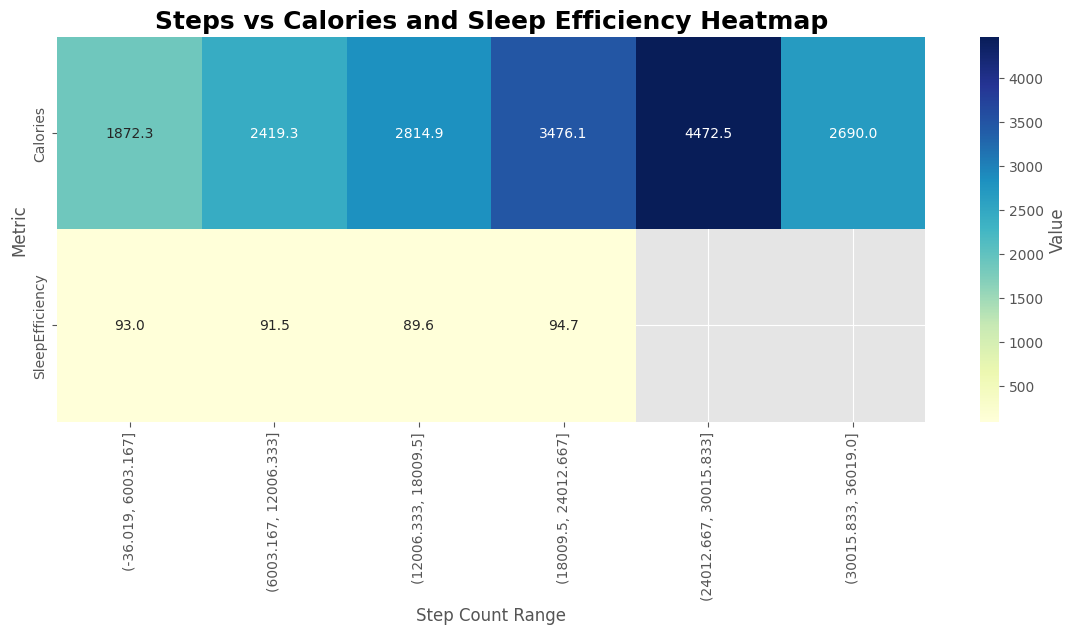

In [54]:
# Chart - 20 visualization code
# Create 2D bins
bins = pd.cut(df['TotalSteps'], bins=6)
pivot = df.groupby(bins).agg({
    'Calories': 'mean',
    'SleepEfficiency': 'mean'
}).reset_index()

# Pivot to matrix format
heatmap_df = pd.DataFrame({
    'StepsRange': pivot['TotalSteps'].astype(str),
    'Calories': pivot['Calories'],
    'SleepEfficiency': pivot['SleepEfficiency']
})

# Heatmap-style bar grid
plt.figure(figsize=(14, 5))
sns.heatmap(heatmap_df[['Calories', 'SleepEfficiency']].T, annot=True, cmap='YlGnBu', fmt=".1f",
            xticklabels=heatmap_df['StepsRange'], cbar_kws={'label': 'Value'})
# Add title and labels
plt.title('Steps vs Calories and Sleep Efficiency Heatmap', fontsize = 18, fontweight = 'bold')
plt.xlabel('Step Count Range', fontsize = 12)
plt.ylabel('Metric', fontsize = 12)
# Show plot
plt.show()

##### **Chart Insights-**

Higher step counts is linked with improved sleep efficiency and increased calorie burn. This shows a self-reinforcing fitness cycle — walk more, sleep better, feel better.

#### Chart - 21 - Correlation Heatmap

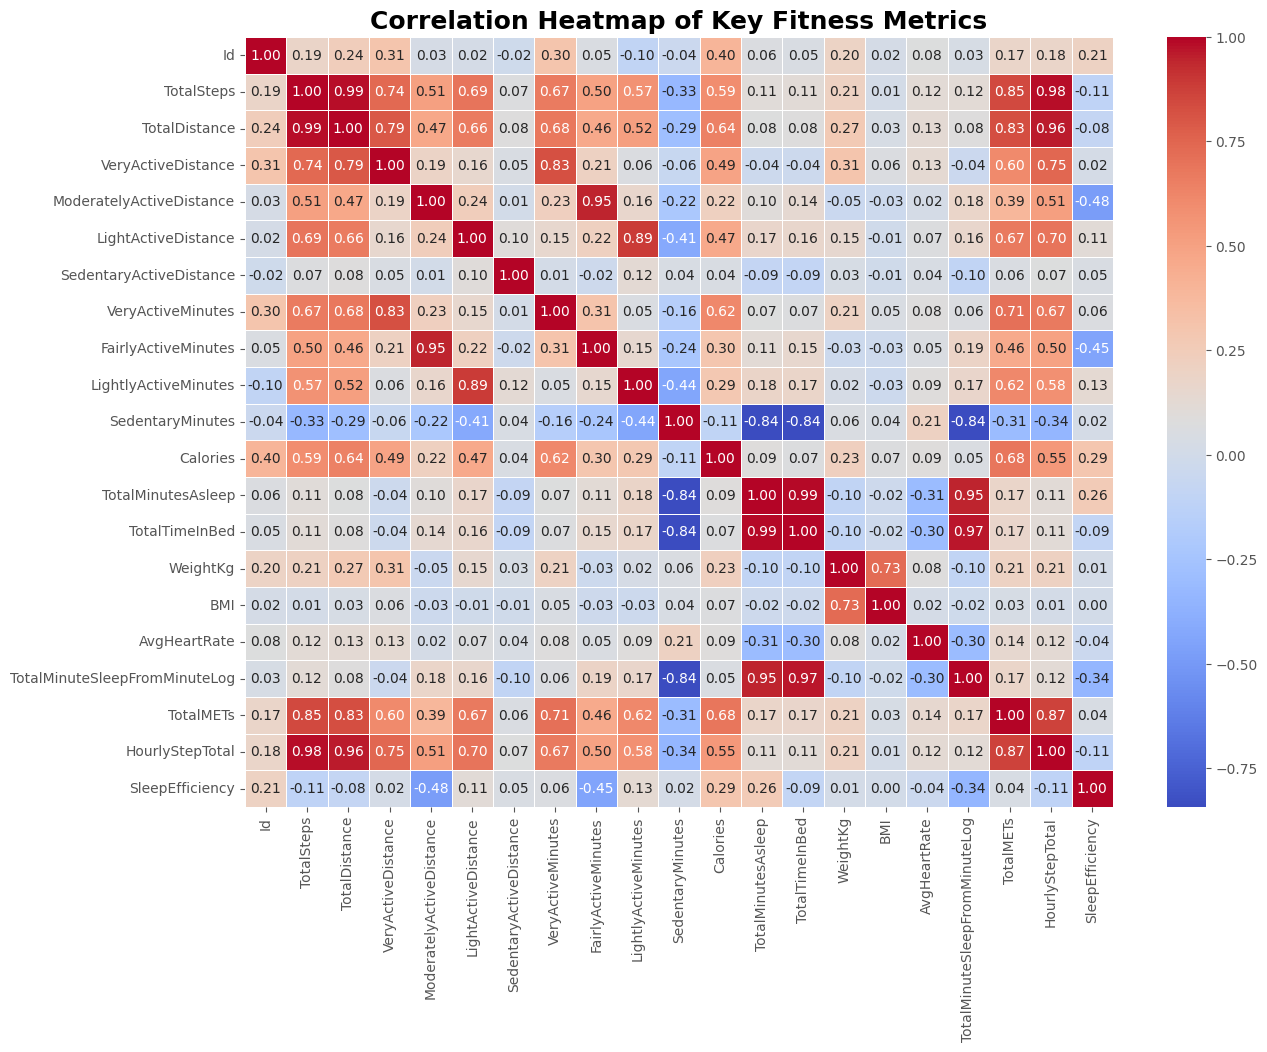

In [55]:
# Correlation Heatmap visualization code
# Select numerical features for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Add title
plt.title('Correlation Heatmap of Key Fitness Metrics', fontsize=18, fontweight = 'bold')
# Show plot
plt.show()

##### **Chart Insights-**

* TotalSteps, Calories, VeryActiveMinutes, TotalMETs all positively correlate with one another at a high level, indicating overall exercise activity.
* TotalMinutesAsleep and TotalTimeInBed are also highly correlated, as expected.
* SedentaryMinutes is weakly or even negatively correlated with most fitness metrics.

#### Chart - 22 - Pair Plot

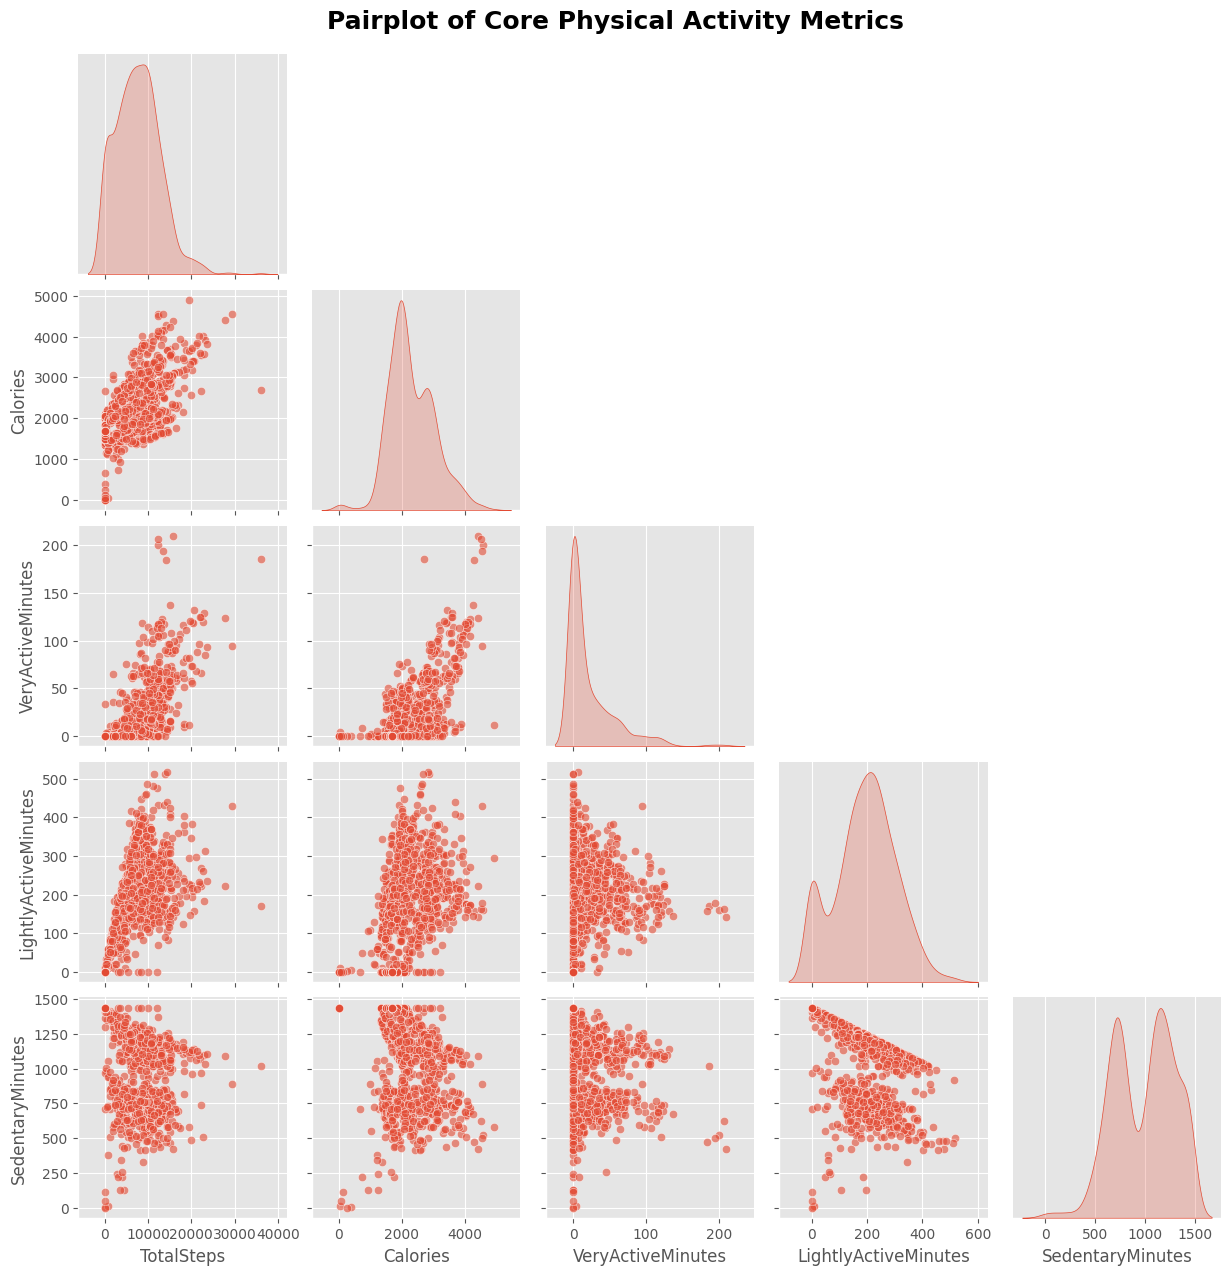

In [56]:
# Pair Plot visualization code
# Choose a subset of features for pairplot
selected_cols = ['TotalSteps', 'Calories', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

# Plot pairplot
sns.pairplot(df[selected_cols], kind='scatter', diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
# Add title
plt.suptitle('Pairplot of Core Physical Activity Metrics', y=1.02, fontsize=18, fontweight = 'bold')
# Show plot
plt.show()

##### **Chart Insights-**

Pairwise plots graphically validate earlier correlation results which is steps, calories, and very active minutes group positively. Sedentary minutes has a negative trend.

# **Conclusion**

In the Python phase of the Strava Fitness data analysis project, we first carried out extensive data cleaning using the pandas library within Python in order to make the dataset suitable for meaningful analysis. This included missing and inconsistent data handling, data type conversions, as well as creating new features like sleep efficiency and activity categories.

Analysis was conducted using SQL and identified key trends and patterns within the data. After SQL-based analysis was done, we went back to Python to create impactful visualizations using Matplotlib and Seaborn libraries.
From visualization, we analyzed strong user behavior patterns like the strong role of active minutes and steps in calorie burn, the trend of sleep and activity levels, average daily steps over time and the indirect influence of sleep efficiency in performance. These visualizations not only confirmed the SQL results but also gave deeper behavioral insights in clear, data-driven visuals.

Overall, the Python phase was able to integrate data preparation and visualization to support and enhance the analysis insights, creating an integrated foundation for the next stage of dashboard building in Power BI.